In [1]:
import numpy as np 
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split,cross_val_score, cross_val_predict
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import accuracy_score, recall_score, precision_recall_curve, ConfusionMatrixDisplay,confusion_matrix

In [2]:
# Loading the dataset
mnist = fetch_openml('mnist_784', as_frame=False)

In [3]:
X = mnist.data
y= mnist.target

In [4]:
X.shape 

(70000, 784)

In [5]:
y.shape

(70000,)

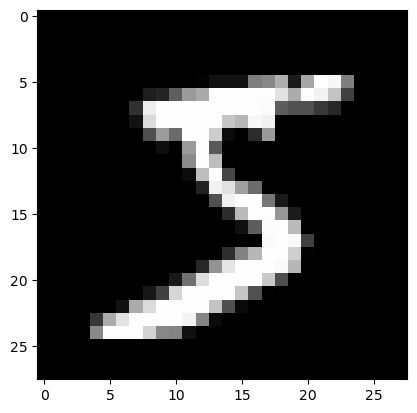

In [6]:
# First image in the first and its associated target variable 
image = X[0].reshape(28,28)
plt.imshow(image, cmap='gray')

In [7]:
y[0]

'5'

### Training a binary classifer to predict handwritten fives


In [9]:
X_train,X_test,y_train,y_test = X[:60000],X[60000:],y[:60000],y[60000:]

In [10]:
# Setting a binary target label for handwritten twos 
y_train_five = (y_train == '5')
y_test_five = (y_test == '5')

In [11]:
len(np.unique(y_test_five))

2

In [12]:
# Building a SGD classifer 
sgd = SGDClassifier() 
sgd.fit(X_train,y_train_five)

SGDClassifier()

In [13]:
# Cross Validation on the training data 
model = cross_val_score(sgd,X_train,y_train_five,cv=5,scoring = 'accuracy')
print(f'the mean accuracy score for the training data was {model.mean()}')

the mean accuracy score for the training data was 0.9628


In [14]:
# Cross validation predictions 
y_train_pred = cross_val_predict(sgd, X_train,y_train_five,cv=5)

In [15]:
# Confusion matrix
cm = confusion_matrix(y_train_five,y_train_pred)

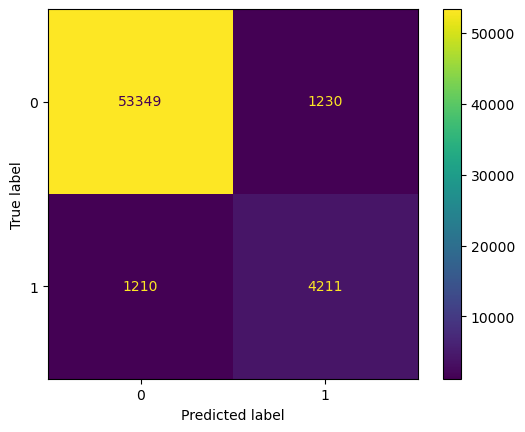

In [16]:
# COnfusion Matrix Display
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

In [17]:
# Computing the precision , recall and F1 scores 
from sklearn.metrics import precision_recall_curve, precision_score, recall_score, f1_score
precision = precision_score(y_train_five, y_train_pred)
precision

0.7739386142253262

In [18]:
recall = recall_score(y_train_five, y_train_pred)
recall

0.7767939494558199

In [19]:
f1score = f1_score(y_train_five,y_train_pred)
f1score

0.7753636531025594

In [20]:
# Plotting a precision recall curve with the help of decision function which is the distance of the sample to the decision boundary 
y_scores = cross_val_predict(sgd,X_train,y_train_five,cv=5, method='decision_function')


In [21]:
# Plotting the pr curve 
precisions, recalls, thresholds = precision_recall_curve(y_train_five,y_scores)

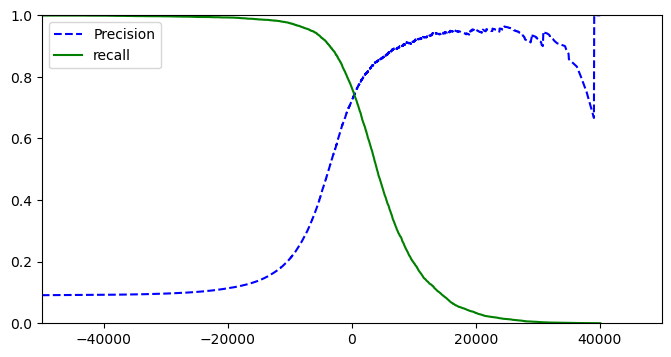

In [22]:
plt.figure(figsize=(8,4))
plt.plot(thresholds, precisions[:-1], 'b--', label ='Precision')
plt.plot(thresholds, recalls[:-1], 'g-',label ='recall')
plt.axis([-50000, 50000, 0,1])
plt.legend()
plt.show()

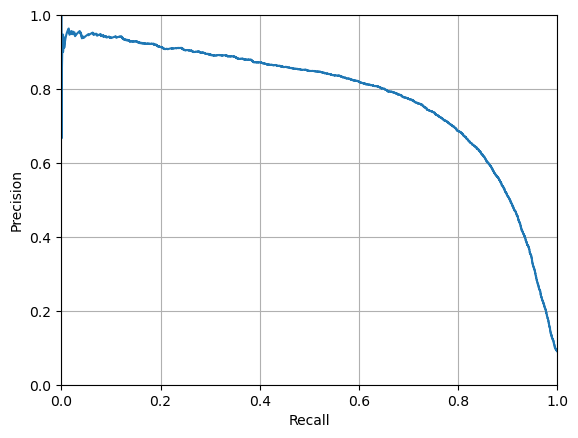

In [23]:
plt.plot(recalls,precisions)
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.axis([0, 1, 0, 1])
plt.grid()
plt.show()

In [24]:
# Changing the threshold  to achieve 80% precision and recall
# adjusting the confidence scores 

threshold = 500
y_train_adjusted = (y_scores > threshold).astype(int)

In [25]:
recall = recall_score(y_train_five, y_train_adjusted)
recall

0.736395498985427

In [26]:
precision = precision_score(y_train_five, y_train_adjusted)
precision

0.7464472700074795

In [27]:
# Plotting the roc curve 
from sklearn.metrics import roc_curve
fpr,tpr,thresholds = roc_curve(y_train_five
                               , y_scores)

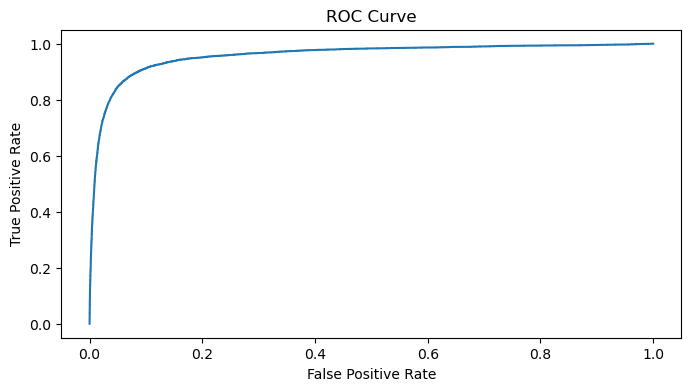

In [28]:
plt.figure(figsize=(8,4))
plt.plot(fpr,tpr)
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.show()

In [29]:
# roc auc score 
from sklearn.metrics import roc_auc_score

scores_auc = roc_auc_score(y_train_five, y_scores) # how well our
                                                #model is able to distinguish between true postive rate 
                                                # and false postive rate using confidence scores or probability scores 
scores_auc

0.958271802237799

- the model is highly discriminative being up to distingusih between the false positive rate and true positive rate quite well

### Random Forest Classifier 

In [32]:
from sklearn.ensemble import RandomForestClassifier

In [33]:
rf = RandomForestClassifier()
rf.fit(X_train,y_train_five)

RandomForestClassifier()

In [34]:
#Getiing probability scores to plot roc curve with random forest classifier 
y_train_proba = cross_val_predict(rf,X_train,y_train_five,cv=5,method='predict_proba')

In [35]:
# Cross validations score with random forest
y_train_pred_rf = cross_val_score(rf,X_train,y_train,cv=5)

In [36]:
y_train_pred_rf.mean()

0.96655

In [37]:
y_train_predictions = cross_val_predict(rf,X_train,y_train_five,cv=5)

In [38]:
#auc-roc score 
score_rf = roc_auc_score(y_train_five,y_train_predictions)
score_rf

0.9390175609238836

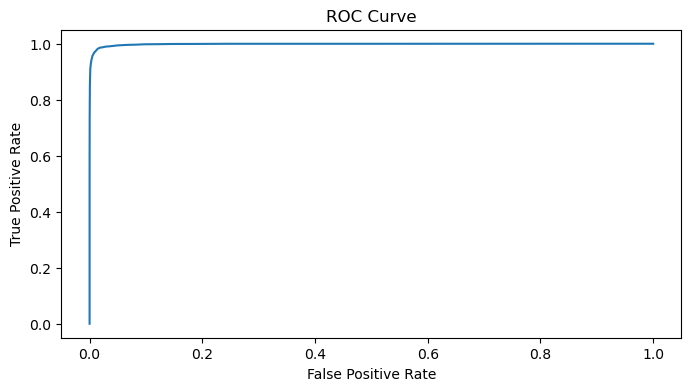

In [39]:
# roc curve 
fpr,tpr,threshold = roc_curve(y_train_five,y_train_proba[:,1])
plt.figure(figsize=(8,4))
plt.plot(fpr,tpr)
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.show()

In [40]:
# Building a KNN classifier to achieve 97% accuracy on the test set 
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(X_train,y_train) 

KNeighborsClassifier()

In [41]:
# Cross Validation metrics on KNN 
cross_val_scores = cross_val_score(knn,X_train,y_train,cv=3,scoring='accuracy')

In [42]:
cross_val_scores.mean()

0.9674166666666667

In [43]:
# Hyperparamater tuning 
param_grid = {
    'n_neighbors': [3, 5, 7, 9, 11],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan', 'minkowski']
}
from sklearn.model_selection import GridSearchCV 
grid_search = GridSearchCV(knn, param_grid= param_grid, cv=3,scoring ='accuracy')

grid_search.fit(X_train[:10000],y_train[:10000])

In [49]:
grid_search.best_estimator_

KNeighborsClassifier(metric='euclidean', n_neighbors=3, weights='distance')

In [51]:
best_model.fit(X_train,y_train) 

KNeighborsClassifier(metric='euclidean', n_neighbors=3, weights='distance')

In [57]:
# Accuracy score on the test set 
y_test_pred = best_model.predict(X_test)
acc_score = accuracy_score(y_test,y_test_pred) 
acc_score

0.9717

### Training SVM classifier on the mnist dataset using the ovR strategy 


In [63]:
from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import SVC
ovr = OneVsRestClassifier(SVC())

In [65]:
ovr.fit(X_train,y_train) 

OneVsRestClassifier(estimator=SVC())

In [67]:
# Score on test set 
y_test_pred = ovr.predict(X_test)
acc_score = accuracy_score(y_test,y_test_pred) 
acc_score

0.98